In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from numpy import random

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
df.isnull().sum()/len(df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [6]:
df["has_health_insur"]=df["has_health_insur"].fillna(df["has_health_insur"].mode()[0])

In [7]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0])

In [8]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0])

In [9]:
cat_col=df.select_dtypes("O")
cat_col.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [10]:
df["age_bracket"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [11]:
df["age_bracket"]=df["age_bracket"].str.replace("Years","")

In [12]:
df["age_bracket"]=df["age_bracket"].str.replace("+","")

In [13]:
#df["age_bracket"]=df["age_bracket"].replace("-","")

In [14]:
df["qualification"]=df["qualification"].fillna(df["qualification"].mode()[0])

In [15]:
df["qualification"].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [16]:
df["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [17]:
df['income_level']=df["income_level"].fillna(df["income_level"].mode()[0])

In [18]:
df["marital_status"].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [19]:
df["marital_status"]=df["marital_status"].fillna(df["marital_status"].mode()[0])

In [20]:
df["housing_status"]=df["housing_status"].fillna(df["housing_status"].mode()[0])

In [21]:
df["housing_status"].unique()

array(['Own', 'Rent'], dtype=object)

In [22]:
df["employment"]=df["employment"].fillna(df["employment"].mode()[0])

In [23]:
df["employment"].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [26]:
df.drop(["unique_id"],axis=1,inplace=True)

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
df.shape

(24803, 33)

In [29]:
cat_col=df.select_dtypes("O")
cat_col.sample(10)

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
5590,35 - 44,Some College,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
23972,18 - 34,College Graduate,White,Female,"> $75,000",Married,Own,Employed,Non-MSA
19752,65,< 12 Years,Other or Multiple,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Not Principle City"
15403,18 - 34,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
6969,65,12 Years,White,Female,"> $75,000",Not Married,Own,Not in Labor Force,Non-MSA
8533,45 - 54,Some College,White,Male,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA
302,55 - 64,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City"
2131,65,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City"
6744,18 - 34,Some College,White,Male,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City"
22047,18 - 34,< 12 Years,White,Male,"> $75,000",Not Married,Own,Not in Labor Force,"MSA, Principle City"


In [30]:
for i in cat_col:
    print(i)
    print (df[i].unique())

age_bracket
['55 - 64 ' '35 - 44 ' '18 - 34 ' '65 ' '45 - 54 ']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex
['Female' 'Male']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status
['Not Married' 'Married']
housing_status
['Own' 'Rent']
employment
['Not in Labor Force' 'Employed' 'Unemployed']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [31]:
def age(i):
    if i=='55 - 64 ':
        i1=random.randint(55,64,size=1)
        return float(i1)
    elif i=='35 - 44 ':
        i2=random.randint(35,44,size=1)
        return float(i2)
    elif i=='18 - 34 ':
        i3=random.randint(18,34,size=1)
        return float(i3)
    elif i=='45 - 54 ':
        i4=random.randint(45,54,size=1)
        return float(i4)
    else:
        return float(i)

In [32]:
df["age_bracket"]=df["age_bracket"].map(age)

In [33]:
df["age_bracket"]=df["age_bracket"].astype("int")

In [34]:
def poverty(i):
    if i=='<= $75,000, Above Poverty':
        return("Above poverty")
    if i=='> $75,000':
        return("Above poverty")
    else:
        return(i)

In [35]:
df["income_level"]=df["income_level"].map(poverty)

In [36]:
df["income_level"].unique()

array(['Below Poverty', 'Above poverty'], dtype=object)

# ENCODING.

In [37]:
cat_cols=df.select_dtypes(include="O")
cat_cols.columns

Index(['qualification', 'race', 'sex', 'income_level', 'marital_status',
       'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [38]:
for i in cat_cols:
    print(i)
    print (df[i].unique())

qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex
['Female' 'Male']
income_level
['Below Poverty' 'Above poverty']
marital_status
['Not Married' 'Married']
housing_status
['Own' 'Rent']
employment
['Not in Labor Force' 'Employed' 'Unemployed']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


# MANUAL ORDINAL ENCODING.

In [39]:
def income(i):
    if i=='Below Poverty':
        return (0)
    elif i=='Above poverty':
        return (1)
    else:
        print(i)

In [40]:
df["income_level"]=df["income_level"].map(income)

In [41]:
df["income_level"]=df["income_level"].astype("int")

In [42]:
def educ(i):
    if i=='< 12 Years':
        return (0)
    elif i=='12 Years':
        return (1)
    elif i=='Some College':
        return (2)
    elif i=='College Graduate':
        return (3)
    else:
        return i

In [43]:
df["qualification"]=df["qualification"].map(educ)

In [44]:
df["qualification"]=df["qualification"].astype("int")

In [45]:
def area(i):
    if i=='Non-MSA':
        return(0)
    elif i=='MSA, Not Principle  City':
        return(1)
    elif i=='MSA, Principle City':
        return(3)
    else:
        return(i)

In [46]:
df["census_msa"]=df["census_msa"].map(area)

In [47]:
df["census_msa"]=df["census_msa"].astype("int")

# LABEL ENCODING.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
col=["race","sex","marital_status","housing_status","employment"]

In [51]:
for i in col:
    df[i]=le.fit_transform(df[i])
    

In [52]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,0,1,0,1,0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,0,1,1,0,1,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,1,0,0,1,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,0,1,1,1,3,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,1,0,0,0,1,1.0,0.0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 24803 non-null  float64
 1   h1n1_awareness             24803 non-null  float64
 2   antiviral_medication       24803 non-null  float64
 3   contact_avoidance          24803 non-null  float64
 4   bought_face_mask           24803 non-null  float64
 5   wash_hands_frequently      24803 non-null  float64
 6   avoid_large_gatherings     24803 non-null  float64
 7   reduced_outside_home_cont  24803 non-null  float64
 8   avoid_touch_face           24803 non-null  float64
 9   dr_recc_h1n1_vacc          24803 non-null  float64
 10  dr_recc_seasonal_vacc      24803 non-null  float64
 11  chronic_medic_condition    24803 non-null  float64
 12  cont_child_undr_6_mnths    24803 non-null  float64
 13  is_health_worker           24803 non-null  flo

<AxesSubplot:>

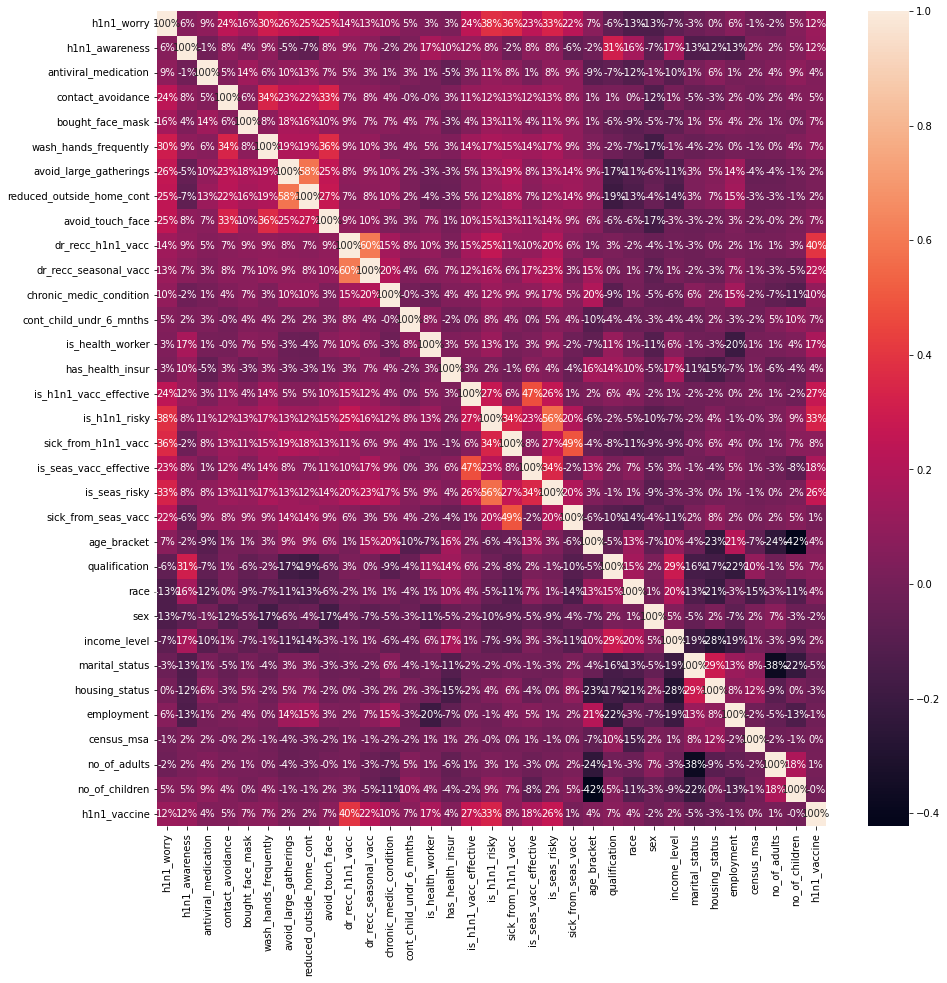

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [55]:
df["h1n1_vaccine"].value_counts()

0    19493
1     5310
Name: h1n1_vaccine, dtype: int64

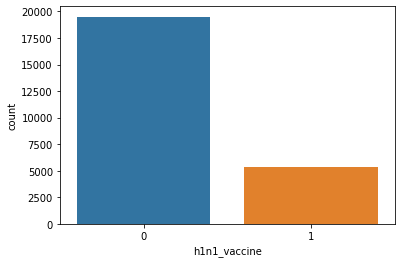

In [85]:
sns.countplot(df["h1n1_vaccine"])
plt.show()

# Spliting data.

In [56]:
X=df.iloc[:,:-1]

In [57]:
Y=df.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=25)

# FEATURE SCALING.

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# MODEL BUILDING

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
reg=LogisticRegression()

In [65]:
reg.fit(X_train,Y_train)

LogisticRegression()

In [66]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

# EVALUATION

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
print("Train_data")
print(accuracy_score(Y_train,y_pred_train))
print("Test_data")
print(accuracy_score(Y_test,y_pred_test))

Train_data
0.8364243750719963
Test_data
0.8342964655288267


In [69]:
from sklearn.metrics import classification_report

In [70]:
print("Train Data")
print(classification_report(Y_train,y_pred_train))
print("Test Data")
print(classification_report(Y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13626
           1       0.69      0.44      0.54      3736

    accuracy                           0.84     17362
   macro avg       0.77      0.69      0.72     17362
weighted avg       0.82      0.84      0.82     17362

Test Data
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5867
           1       0.67      0.42      0.52      1574

    accuracy                           0.83      7441
   macro avg       0.77      0.68      0.71      7441
weighted avg       0.82      0.83      0.82      7441



# CONFUSION MATRIX.

In [71]:
from sklearn.metrics import confusion_matrix
print("Train Data")
print(confusion_matrix(Y_train,y_pred_train))
print("Test Data")
print(confusion_matrix(Y_test,y_pred_test))

Train Data
[[12878   748]
 [ 2092  1644]]
Test Data
[[5546  321]
 [ 912  662]]


In [72]:
Y_train_proba=reg.predict_proba(X_train)
Y_train_proba

array([[0.94774697, 0.05225303],
       [0.69115456, 0.30884544],
       [0.89036141, 0.10963859],
       ...,
       [0.83933756, 0.16066244],
       [0.95331341, 0.04668659],
       [0.20994488, 0.79005512]])

In [73]:
Y_train_proba=reg.predict_proba(X_train)[:,1]
Y_train_proba

array([0.05225303, 0.30884544, 0.10963859, ..., 0.16066244, 0.04668659,
       0.79005512])

In [74]:
Y_test_proba=reg.predict_proba(X_test)
Y_test_proba 

array([[0.4435898 , 0.5564102 ],
       [0.90337374, 0.09662626],
       [0.93631418, 0.06368582],
       ...,
       [0.92264201, 0.07735799],
       [0.94362156, 0.05637844],
       [0.51334916, 0.48665084]])

In [75]:
Y_test_proba=reg.predict_proba(X_test)[:,1]
Y_test_proba 

array([0.5564102 , 0.09662626, 0.06368582, ..., 0.07735799, 0.05637844,
       0.48665084])

# P R CURVE

In [76]:
from sklearn.metrics import precision_recall_curve

In [77]:
p,r,th=precision_recall_curve(Y_train,Y_train_proba)

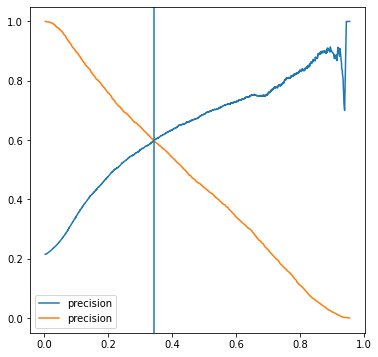

In [78]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label="precision")
plt.axvline(0.344)
plt.show()

In [79]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
def metrics(y_actual,Y_train_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in Y_train_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"Accuracy":accuracy,"Recall":recall,"Precision":precision,"F1":f1,"ROC_AUC":roc_auc}

In [80]:
print("Train Data")
print(metrics(Y_train,Y_train_proba,0.344))
print("Test Data")
print(metrics(Y_test,Y_test_proba,0.344))

Train Data
{'Accuracy': 0.8273240410091003, 'Recall': 0.5960920770877944, 'Precision': 0.5993003229278795, 'F1': 0.5976918947933442, 'ROC_AUC': 0.7434078468515444}
Test Data
{'Accuracy': 0.8270393764278995, 'Recall': 0.5895806861499364, 'Precision': 0.591459528362014, 'F1': 0.5905186127903277, 'ROC_AUC': 0.7401627650964442}


In [81]:
from sklearn.metrics import roc_curve

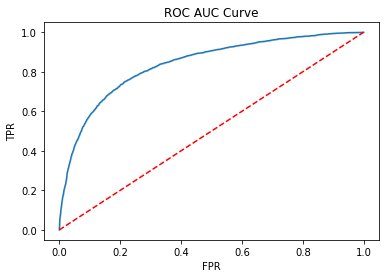

In [86]:
fpr,tpr,th=roc_curve(Y_train,Y_train_proba)
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color="red",linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.show()